# Resultados

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import joblib
from utils import *

In [3]:
dataset =  pd.read_csv('..\euthyroid_sick_syndrome\datasets\euthyroid\euthyroid_final_features.csv')
output_label_dataset = dataset['classification']  #1 = sick, 0 = normal
dataset = dataset[['age', 'sex', 'sick', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']]
dataset_res, ouput_label = balance_dataset_smote(dataset, output_label_dataset, random_state=42, k_neighbors=5)
input_train, input_test, output_train, output_test = slipt_and_standardize_dataset(dataset=dataset_res, output_label=ouput_label)  

## Modelos: 
1. Decision Tree
2. Random Forest
3. Logistic Regression
4. Naive Bayes

In [5]:
model_decision_tree = joblib.load('..\euthyroid_sick_syndrome\models_file\DecisionTreeClassifier.sav')
model_random_forest = joblib.load('..\euthyroid_sick_syndrome\models_file\RandomForestClassifier.sav')
model_logistic = joblib.load('..\euthyroid_sick_syndrome\models_file\LogisticRegression.sav')
model_naive_bayes = joblib.load('..\euthyroid_sick_syndrome\models_file\ClassifierBayes.sav')

In [6]:
output_model_decision = model_decision_tree.predict(input_test)
output_model_random = model_random_forest.predict(input_test)
output_model_logistic = model_logistic.predict(input_test)
output_model_bayes = model_naive_bayes.predict(input_test)

## Métricas para o modelo Decision Tree

In [7]:
accuracy(output_test, output_model_decision)
precision(output_test, output_model_decision) 
recall(output_test, output_model_decision) 
f1(output_test, output_model_decision)


A acurácia é de:  0.9817073170731707
A precisão é de:  0.9719789842381786
A pontuação de recall é de:  0.9910714285714286
A pontuação de F1 é de:  0.9814323607427056


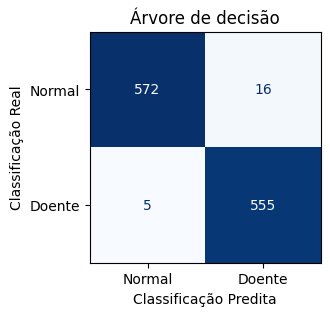

In [8]:
fig = plot_confusion_matrix(output_test, output_model_decision, model=model_decision_tree, title='Árvore de decisão')
#salva figura
fig.figure_.savefig('confusion_matrix_decision_tree.png', dpi=300, bbox_inches='tight')

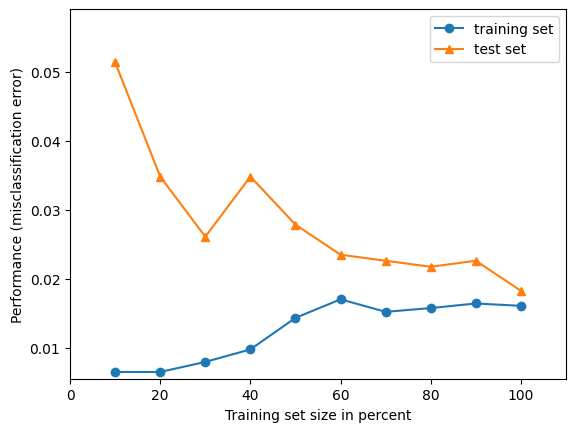

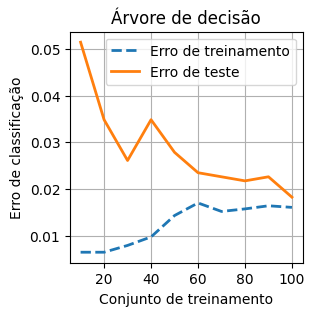

In [9]:
fig = miss_classification(input_train, output_train, input_test, output_test, model_decision_tree, title='Árvore de decisão')
fig.savefig('error_decision_tree.png', dpi=300, bbox_inches='tight')

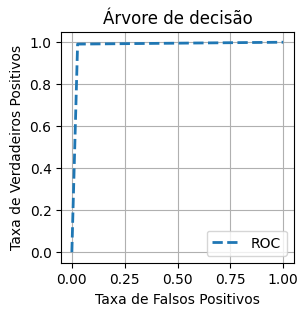

In [10]:
fig = roc(output_test, output_model_decision, title = "Árvore de decisão")
fig.savefig('roc_decision_tree.png', dpi=300, bbox_inches='tight')

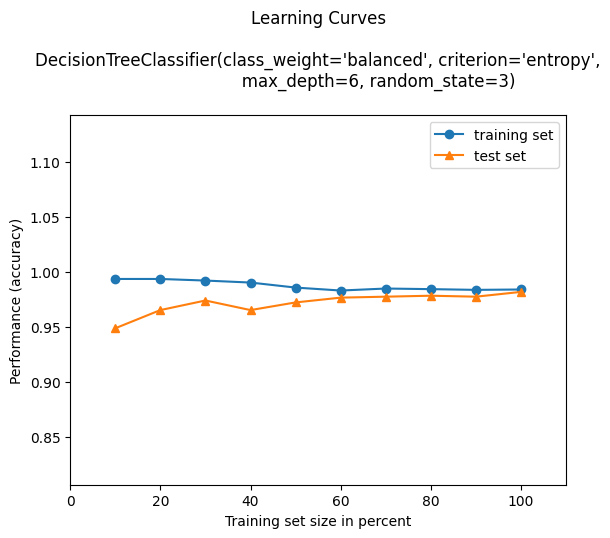

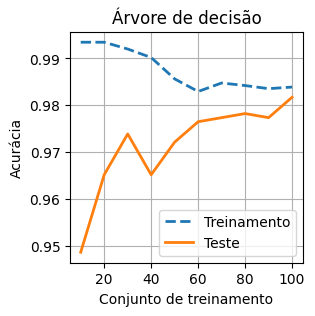

In [8]:
fig = learning_curves(input_train, output_train, input_test, output_test, model_decision_tree, title='Árvore de decisão')
fig.savefig('aprendizado_decision_tree.png', dpi=300, bbox_inches='tight')

## Métricas para o modelo Random Forest

In [11]:
accuracy(output_test, output_model_random)
precision(output_test, output_model_random) 
recall(output_test, output_model_random) 
f1(output_test, output_model_random)


A acurácia é de:  0.9834494773519163
A precisão é de:  0.9838998211091234
A pontuação de recall é de:  0.9821428571428571
A pontuação de F1 é de:  0.9830205540661303


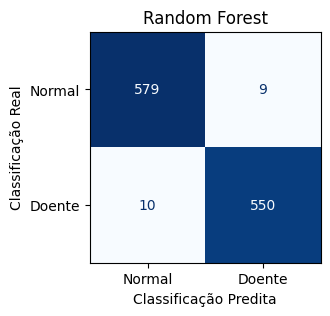

In [12]:
fig = plot_confusion_matrix(output_test, output_model_random, model_random_forest, "Random Forest")
fig.figure_.savefig('confusion_matrix_random.png', dpi=300, bbox_inches='tight')

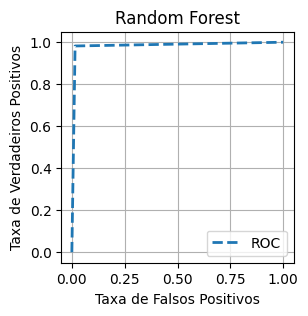

In [13]:
fig = roc(output_test, output_model_random, title = "Random Forest")
fig.savefig('roc_random.png', dpi=300, bbox_inches='tight')

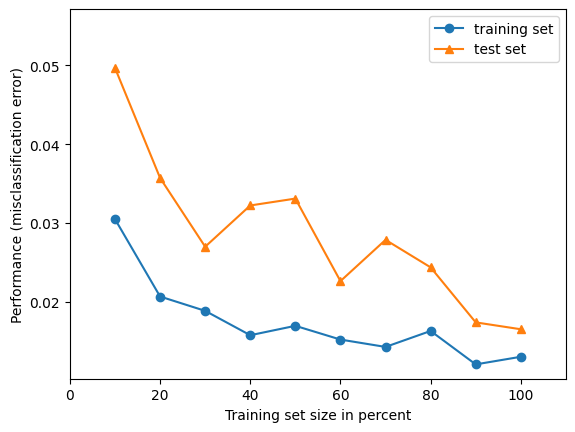

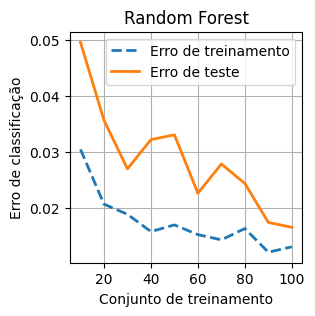

In [14]:
fig = miss_classification(input_train, output_train, input_test, output_test, model_random_forest, title='Random Forest')
fig.savefig('error_random.png', dpi=300, bbox_inches='tight')

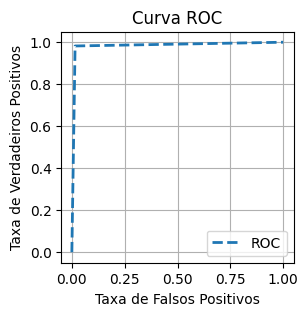

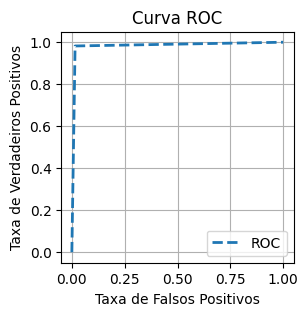

In [15]:
roc(output_test, output_model_random)

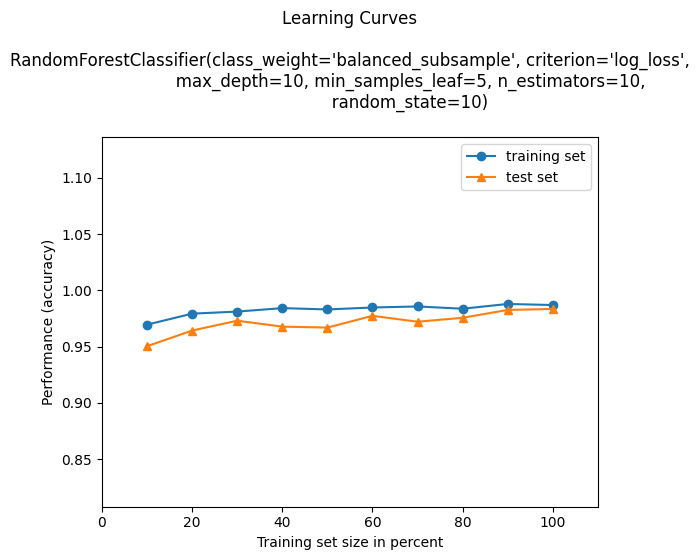

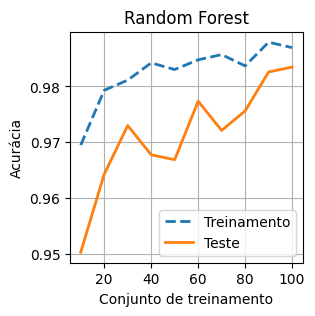

In [16]:
fig = learning_curves(input_train, output_train, input_test, output_test, model_random_forest, title='Random Forest')
fig.savefig('aprendizado_random.png', dpi=300, bbox_inches='tight')

## Métricas para o modelo Logistic Regression

In [17]:
accuracy(output_test, output_model_logistic)
precision(output_test, output_model_logistic)
recall(output_test, output_model_logistic)
f1(output_test, output_model_logistic)



A acurácia é de:  0.9198606271777003
A precisão é de:  0.90625
A pontuação de recall é de:  0.9321428571428572
A pontuação de F1 é de:  0.9190140845070423


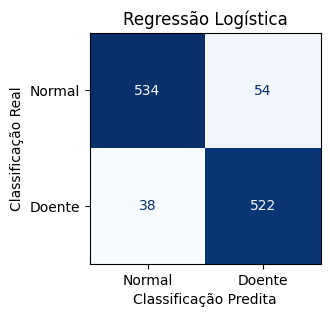

In [18]:
fig = plot_confusion_matrix(output_test, output_model_logistic, model_logistic, "Regressão Logística")
fig.figure_.savefig('confusion_matrix_logistic.png', dpi=300, bbox_inches='tight')

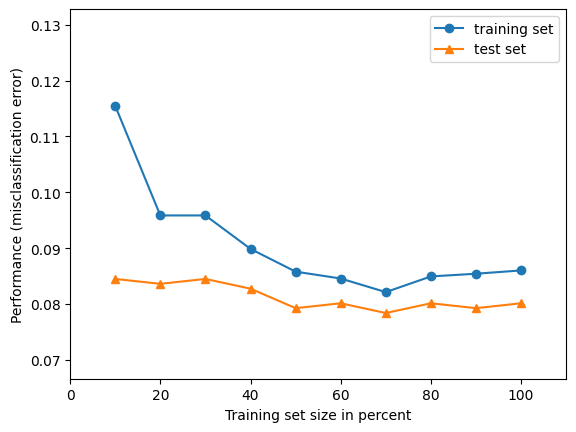

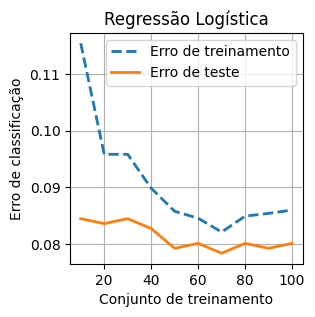

In [ ]:
fig = miss_classification(input_train, output_train, input_test, output_test, model_logistic, title='Regressão Logística')
fig.savefig('error_logistic.png', dpi=300, bbox_inches='tight')


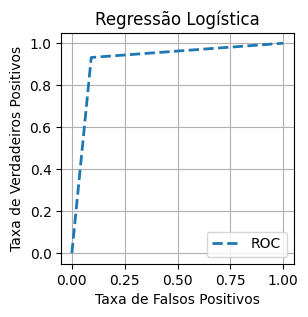

In [19]:
fig = roc(output_test, output_model_logistic, title = "Regressão Logística")
fig.savefig('roc_logistic.png', dpi=300, bbox_inches='tight')

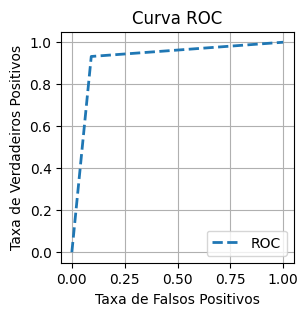

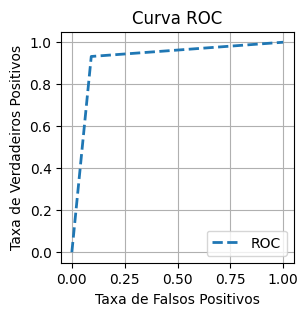

In [20]:
roc(output_test, output_model_logistic)

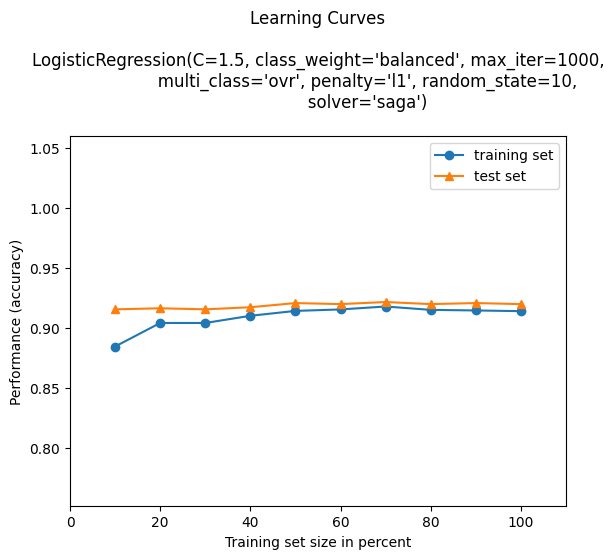

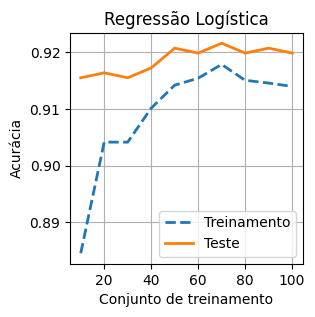

In [21]:
fig = learning_curves(input_train, output_train, input_test, output_test, model_logistic, title='Regressão Logística')
fig.savefig('aprendizado_logistic.png', dpi=300, bbox_inches='tight')

## Métricas para modelo Naive Bayes

In [22]:
accuracy(output_test, output_model_bayes)
precision(output_test, output_model_bayes)
recall(output_test, output_model_bayes)
f1(output_test, output_model_bayes)


A acurácia é de:  0.8493031358885017
A precisão é de:  0.7963246554364471
A pontuação de recall é de:  0.9285714285714286
A pontuação de F1 é de:  0.8573784006595219


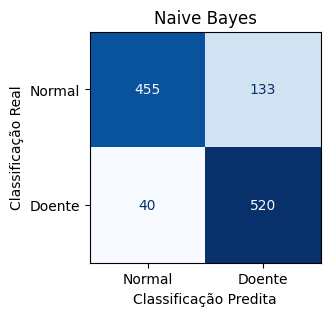

In [23]:
fig = plot_confusion_matrix(output_test, output_model_bayes, model_naive_bayes, "Naive Bayes")
fig.figure_.savefig('confusion_matrix_bayes.png', dpi=300, bbox_inches='tight')

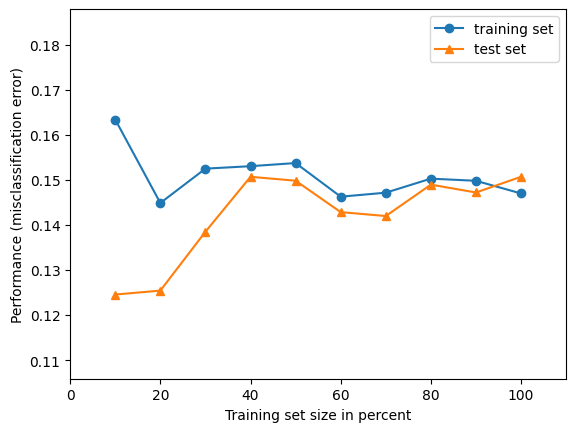

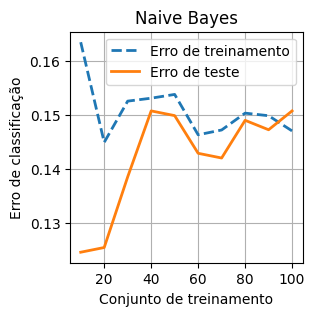

In [24]:
fig = miss_classification(input_train, output_train, input_test, output_test, model_naive_bayes.best_estimator_, title='Naive Bayes')
fig.savefig('error_bayes.png', dpi=300, bbox_inches='tight')

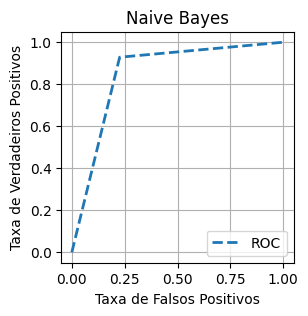

In [25]:
fig = roc(output_test, output_model_bayes, title = "Naive Bayes")
fig.savefig('roc_bayes.png', dpi=300, bbox_inches='tight')

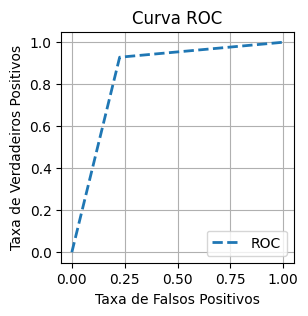

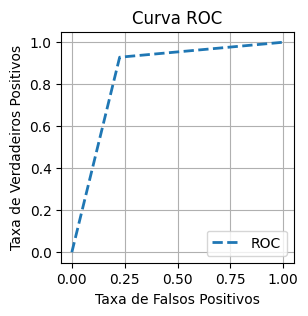

In [26]:
roc(output_test, output_model_bayes)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits
Fitting 10 folds for each of 5 candidates, totalling 50 fits


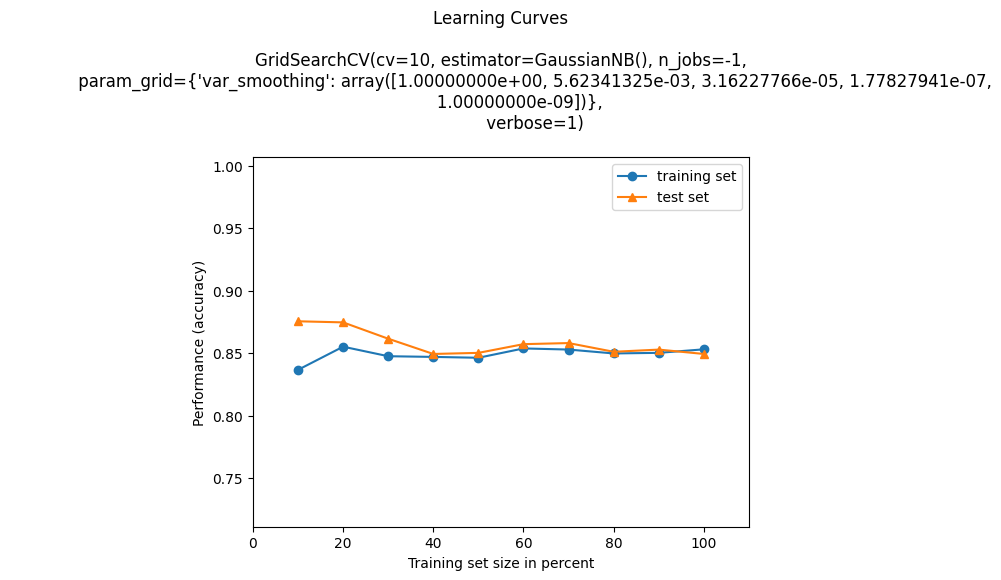

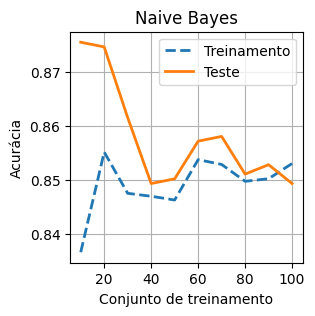

In [27]:
fig = learning_curves(input_train, output_train, input_test, output_test, model_naive_bayes, title='Naive Bayes')
fig.savefig('aprendizado_bayes.png', dpi=300, bbox_inches='tight')